
# Project: Analysis TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The movie dataset contains information about 10000 movies collected from the movie database, including their popularity, budget, revenue, etc.

The goal is to investigate the data and answer some questions, What is the average run time over years, Do rating follows a normal distribution, what the most popular genres year to year, do popularity associate with rating, having a high budget affect the rating, and having a high budget mean high revenue?

### Importing necessary modules and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling



### Data Dictionary
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [4]:
#Loading data and print out a few lines.
movies_df=pd.read_csv('tmdb-movies.csv')
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
#number of columns and rows
movies_df.shape

(10866, 21)

As you can see this dataset has 10866 rows and 21 columns, every row is movies has its budget, revenue, etc.

In [6]:
#checking for:
#Data type
#Missing value
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#count up the number of null values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are many miss values and unnecessary columns for investigation.

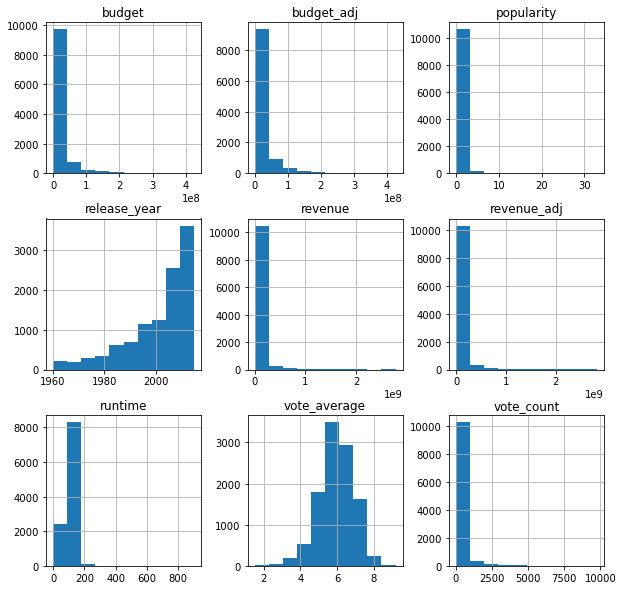

In [8]:
#Create a list of necessary columns
columns=['popularity','budget','revenue','vote_count',"runtime",'vote_average','release_year','budget_adj','revenue_adj']
#Checking the distribution of data
movies_df[columns].hist(figsize=(10,10));

As you can see most of the data are skew to the right except release year and average vote.

In [9]:
#Understand the data and identify any changes that will have to make.
movies_df[columns].describe()

,popularity,budget,revenue,vote_count,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,217.389748,102.070863,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,575.619058,31.381405,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,17.000000,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,38.000000,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,145.750000,111.000000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The zero in data will skew the analysis, so in order to proper analysis it 0 need to be drop.

In [10]:
#Checking for duplicate
movies_df.duplicated().sum()

1

some columns are not important to the intended analysis, therefore will be removed. the zero in some columns have to be removed because it skews the analysis, a way to remove it to use the drop null method, but first, replace every 0 with null using NumPy and then drop it, and lastly drop duplicate using drop duplicate

### Data Cleaning 

In [11]:
#drop unnecessary columns
movies_df.drop(["imdb_id","homepage","cast","director","tagline","keywords","overview","production_companies"],axis=1,inplace=True)

In [12]:
#replace every 0 with null
movies_df['budget'].replace(0, np.NAN, inplace=True)
movies_df['revenue'].replace(0, np.NAN, inplace=True)
movies_df['budget_adj'].replace(0, np.NAN, inplace=True)
movies_df['revenue_adj'].replace(0, np.NAN, inplace=True)

In [13]:
#drop nulls
movies_df.dropna(inplace=True)

In [14]:
#drop duplicates
movies_df.drop_duplicates(inplace=True)

In [15]:
#Checking columns
movies_df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [16]:
#number of columns and rows after cleaning
movies_df.shape

(3854, 13)

In [17]:
#check for null
movies_df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [18]:
#check for duplicates 
movies_df.duplicated().sum()

0

In [19]:
#Checks for successful of dropping 0
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


 Now the data is more appropriate to analysis, dropping unnecessary columns, get rid of zero and drop duplicates.     

<a id='eda'></a>
## Exploratory Data Analysis



### The average run time over years

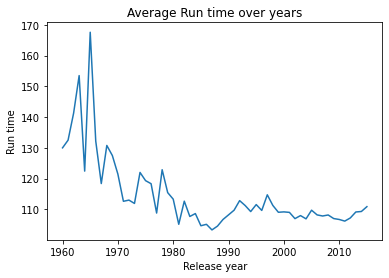

In [20]:
movies_df.groupby(by='release_year')['runtime'].mean().plot()
plt.title("Average Run time over years")
plt.xlabel("Release year")
plt.ylabel("Run time");

The run time in 1965 reached its peak then it starts to decrease over time.

###  Distribution of Rating

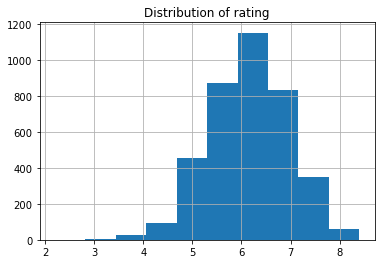

In [21]:
#Hist plot to visual distribution rating
movies_df['vote_average'].hist()
plt.title('Distribution of rating');

The rating follows a normal distribution

### Which genres are most popular from year to year?

In [22]:
#Group by release_year then find the max of popularity  
movies_df.groupby(by='release_year')[['popularity',"genres"]].max()

,popularity,genres
release_year,,
1960,2.610362,Drama|Horror|Thriller
1961,2.631987,Western|Action
1962,3.170651,Western|Action|Adventure|Drama
1963,2.508235,Horror
1964,3.153791,Drama|Romance
1965,1.910465,Drama|Romance|War
1966,0.670274,Mystery|Thriller
1967,2.550704,Music|Drama|Romance
1968,3.309196,Western


it seems genres various from year to year, but the most popular genre is drama.

### Do popularity associated with rating ?

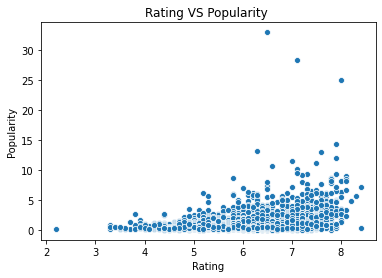

In [23]:
#scatter plot to see if there any relation between popularity and rating 
sns.scatterplot(data=movies_df,x='vote_average',y='popularity')
plt.title("Rating VS Popularity ")
plt.xlabel("Rating")
plt.ylabel("Popularity"); 

The graph doesn't indicate the movies with higher popularity receive a higher rating.

### Did movies with a higher budger received a better rating?

In [24]:
# View the min, 25%, 50%, 75%, max budget_adj values with Pandas describe
movies_df['budget_adj'].describe()

count    3.854000e+03
mean     4.423999e+07
std      4.480925e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [25]:
# Bin edges that will be used to "cut" the data into groups
bin_edges=[9.693980e-01,1.316623e+07,3.005030e+07,6.076720e+07,4.250000e+08]

In [26]:
# Labels for the four Budget level groups
bin_names = ['very low' ,'low' ,'medium' ,'high' ] # Name each budget level category

In [27]:
# Creates bedget_levels column
movies_df['budget_level']=pd.cut(movies_df['budget'],bin_edges,labels=bin_names)
# Checks for successful creation of this column
movies_df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_level
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high


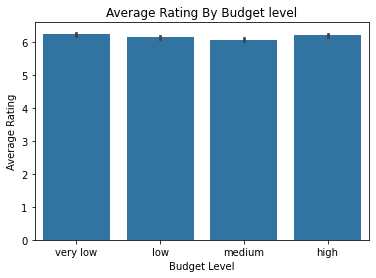

In [28]:
#bar plot to compare the budget level and rating 
base_color=sns.color_palette()[0]
sns.barplot(data=movies_df,x='budget_level',y='vote_average',color=base_color);
plt.title("Average Rating By Budget level")
plt.xlabel("Budget Level")
plt.ylabel("Average Rating");

Higher budget or not a movie will not receive a better rating.

### Having high budget mean high revenue ?

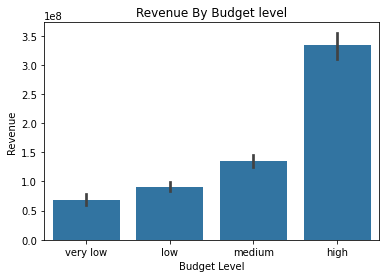

In [29]:
#bar plot to compare the budget level and revenue   
sns.barplot(data=movies_df,x='budget_level',y='revenue_adj',color=base_color)
plt.title("Revenue By Budget level")
plt.xlabel("Budget Level")
plt.ylabel("Revenue");

Movies with a higher budget do receive higher revenue.

<a id='conclusions'></a>
## Conclusions


the goal was fulfilled and Many things are found,if a movie genre is a drama it has a higher chance to get popular than other movies. the higher budget the higher revenue. but in the end, even if a movie has a high budget and is popular doesn’t mean a better rating.

### Limitations

many information removed in the cleaning process, rows contained 0 values and null values. few thousand rows of movies were cut, which would affect the analysis.

the movie received a various number of votes. which would affect movies with fewer votes or higher votes would not be accurate.

There should be a consistent way to collect the information to make it useful for analyzing the data.